In [20]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,BatchNormalization, Activation
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [3]:
import glob

In [4]:
from matplotlib import pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

## Load the dataset

In [12]:
fileNames=glob.glob(r"D:/Studies/Projects/LankfordCoefficientPrediction/MATRIX/*.txt")
odf_data=np.zeros((len(fileNames),19,19))
for i,fname in enumerate(fileNames):
    data=np.loadtxt(fname)
    odf_data[i,:,:]=data.reshape(19,19)
    

In [13]:
LankfordFileNames=glob.glob(r"D:/Studies/Projects/LankfordCoefficientPrediction/LankfordData/*.txt")
r_data=np.zeros((len(fileNames),3))
for i,fname in enumerate(LankfordFileNames):
    data=np.loadtxt(fname,skiprows=1)
    r_values_allangle=data[:,2]
    r_value_3angle=r_values_allangle[[0,3,6]]
    r_data[i,:]=r_value_3angle.reshape(1,3)

In [14]:
len(LankfordFileNames)

10000

## Visualize some ODF data

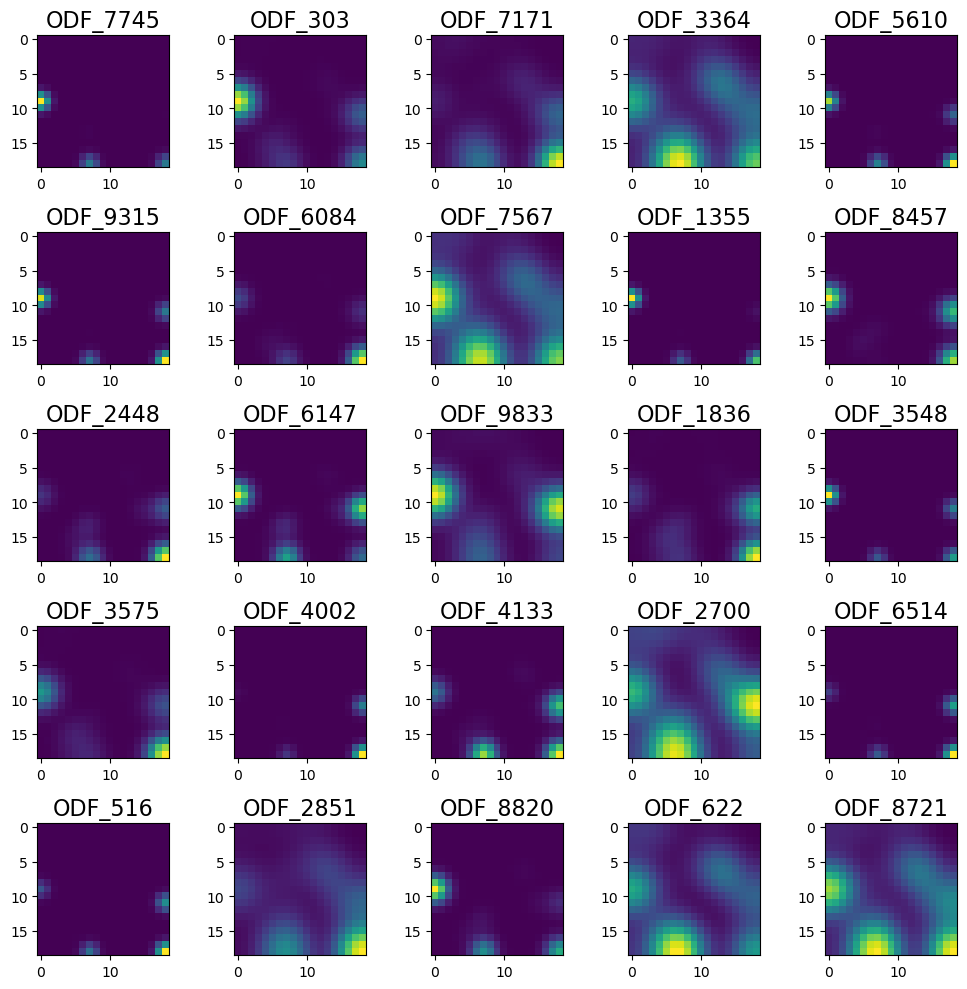

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axs.flatten()):
    ind=np.random.randint(0,10000)

    ax.imshow(odf_data[ind,:,:])
    ax.set_title(f'ODF_{ind+1}', fontsize=16)

plt.tight_layout()
plt.show()


### Just renaming the features and target to more general terms 'X' and 'y'

In [16]:
X = odf_data
y = r_data      

In [17]:
# rescaling just to perform scaling operation. Neural networks work better with normalized dataset
X=X.reshape(10000,-1) 
#scaler = StandardScaler()
scaler=MinMaxScaler() # min max scaler performed better. You can try both scalers and see the difference as well
X= scaler.fit_transform(X)
X=X.reshape(10000,19,19)

In [18]:
# Reshape X to add channel dimension (for our images, channels=1)
X = X.reshape(-1, 19, 19, 1)
X.shape

(10000, 19, 19, 1)

In [21]:
# Train-Test Split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
dropout=0.1
filtersize=(3,3)

In [23]:
# Build the CNN model
model = Sequential([
    Conv2D(32, filtersize, input_shape=(19, 19, 1),padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout),

    Conv2D(64, filtersize,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout),

    Conv2D(128, filtersize,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout),


    Conv2D(64, filtersize,padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(dropout),



    Flatten(),
    Dense(128),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout),

    Dense(64),
    BatchNormalization(),
    Activation('relu'),
    Dropout(dropout),
    
    Dense(3, activation='linear')  # Output layer for predicting r-values
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.005), loss='mean_squared_error', metrics=['mae'])



model.summary()


c:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 19, 19, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 19, 19, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 19, 19, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 9, 9, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 9, 9, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 9, 9, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 64)       │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 2, 2, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           51

 Total params: 185,155 (723.26 KB)

 Trainable params: 184,195 (719.51 KB)

 Non-trainable params: 960 (3.75 KB)

In [24]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=200, validation_split=0.2)

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - loss: 0.7411 - mae: 0.6155 - val_loss: 0.5564 - val_mae: 0.5998
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.2086 - mae: 0.2799 - val_loss: 0.2750 - val_mae: 0.3868
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - loss: 0.1362 - mae: 0.2362 - val_loss: 0.1534 - val_mae: 0.2856
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - loss: 0.0900 - mae: 0.1993 - val_loss: 0.1511 - val_mae: 0.2887
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 0.0772 - mae: 0.1811 - val_loss: 0.1399 - val_mae: 0.2480
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0561 - mae: 0.1583 - val_loss: 0.1130 - val_mae: 0.2154
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 0.0456 - mae: 0.1444 - val_loss: 0.1290 - val_mae: 0.2351
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0474 - mae: 0.1441 - val_loss: 0.1122 - val_mae: 0.2174
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 0.046

In [25]:
# Evaluate the model
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Loss: {test_loss}, Test MAE: {test_mae}')

63/63 - 0s - 7ms/step - loss: 0.0084 - mae: 0.0487
Test Loss: 0.00844936165958643, Test MAE: 0.04873012378811836


In [26]:
y_pred=model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


### Visualizing the predicted values with actual values

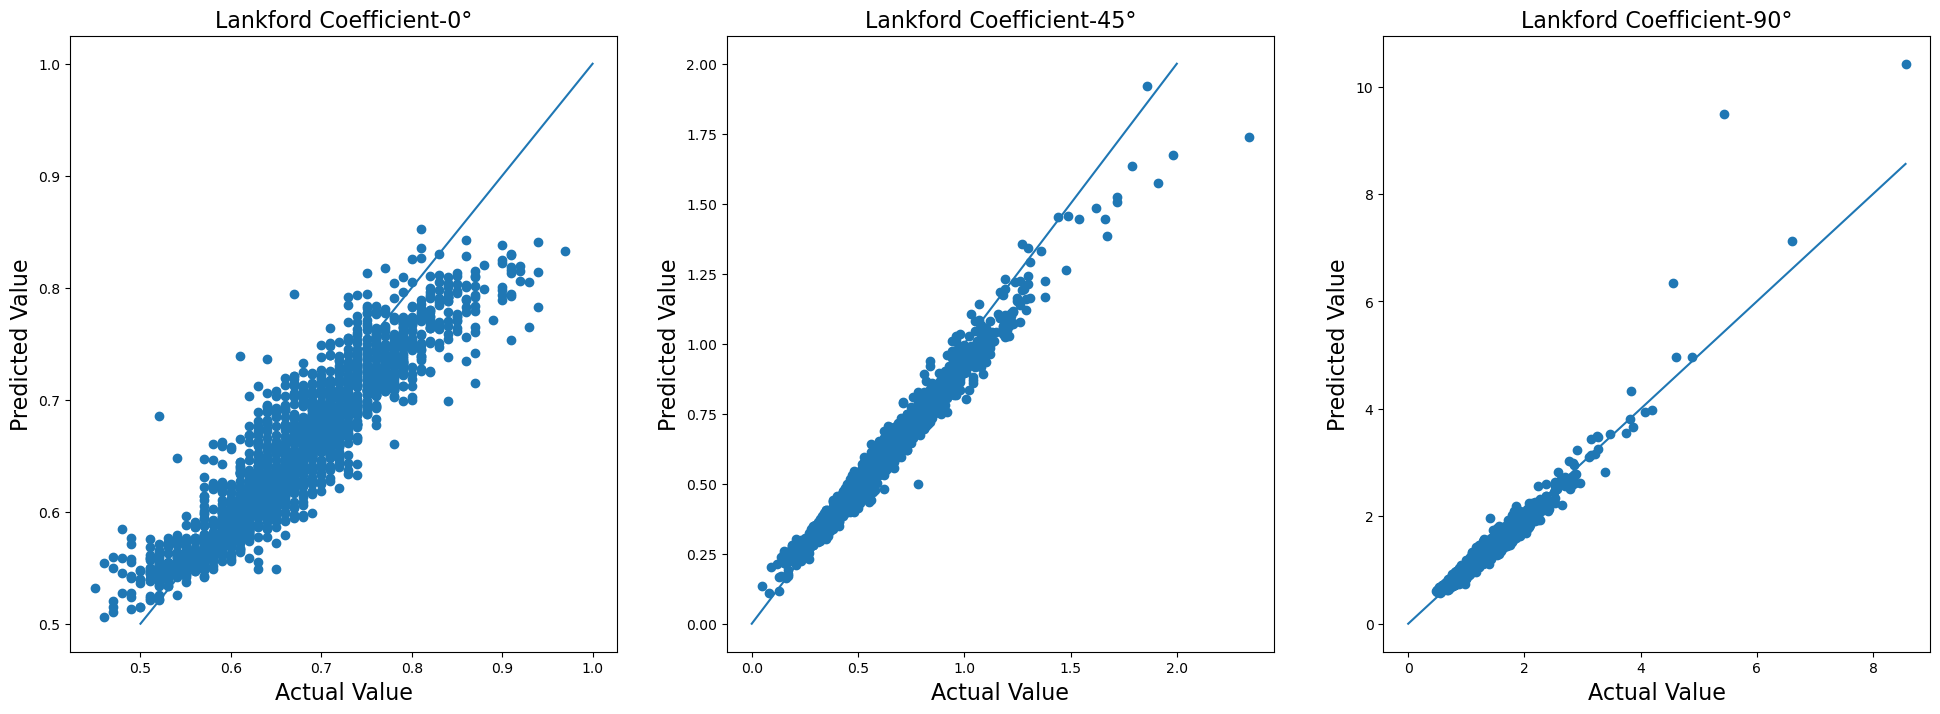

In [27]:
plt.figure(figsize = (24,8)) 
plt.subplot(1,3,1)
plt.scatter(y_test[:,0],y_pred[:,0])
plt.plot([0.5,1],[0.5,1])
plt.title('Lankford Coefficient-0°',fontsize=16)
plt.xlabel('Actual Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)

plt.subplot(1,3,2)
plt.scatter(y_test[:,1],y_pred[:,1])
plt.plot([0,2],[0,2])
plt.title('Lankford Coefficient-45°',fontsize=16)
plt.xlabel('Actual Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)

plt.subplot(1,3,3)
plt.scatter(y_test[:,2],y_pred[:,2])
plt.plot([0,max(y_test[:,2])],[0,max(y_test[:,2])])
plt.title('Lankford Coefficient-90°',fontsize=16)
plt.xlabel('Actual Value', fontsize=16)
plt.ylabel('Predicted Value', fontsize=16)

plt.show()